## Import Libraries

In [15]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Load the dataset
**note: we are going to call the dataset "health"**

In [5]:
health = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health

health.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Get familiar with the dataset


In [6]:
# Check the data types
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# Check the number of rows and columns
health.shape

(5110, 12)

In [49]:
mean_gender = health['gender'].value_counts().mean()


In [8]:
health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# Check the summary statistics
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
# remove all duplicated values

health.duplicated().sum()

0

## Clean the Data 

### There are two options for handling missing values in the dataset:

**1. Fill missing values in the 'bmi' column with the mean value.**

**2. Drop all rows with any missing values entirely**

In [14]:
# option1: fill the missing values in column 'bmi' with the average of all the values in same column

health['bmi'].mean()
health['bmi'] = health['bmi'].fillna(health['bmi'].mean())
health.isnull().sum()




id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### I will be working with the dataset where all rows with null values have been dropped, and I will refer to this new dataset as 'health_drop'

In [16]:
# To avoid any mix-up, I will re-import the dataset and drop all rows with missing values
health_drop = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
health_drop.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
# Drop all missing values 
health_drop = health_drop.dropna()
health_drop 
health_drop.isnull().sum()
health_drop.shape


(4909, 12)

In [19]:
# remove all duplicated values

health_drop.duplicated().sum()

0

In [163]:
# Convert 'hypertension' column to "Yes" for 1 and "No" for 0
health_drop['hypertension'] = health_drop['hypertension'].map({1: 'Yes', 0: 'No'})
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_count,age_group
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,209,209,60-80
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,209,209,60-80
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,209,209,40-60
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,209,209,60-80
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,209,209,80+


In [20]:
# convert 'age' from float to integer
health_drop['age'] = health_drop['age'].astype(int)
health_drop['age'].dtype


dtype('int32')

In [21]:
health_drop.dtypes

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Exploration(EDA)

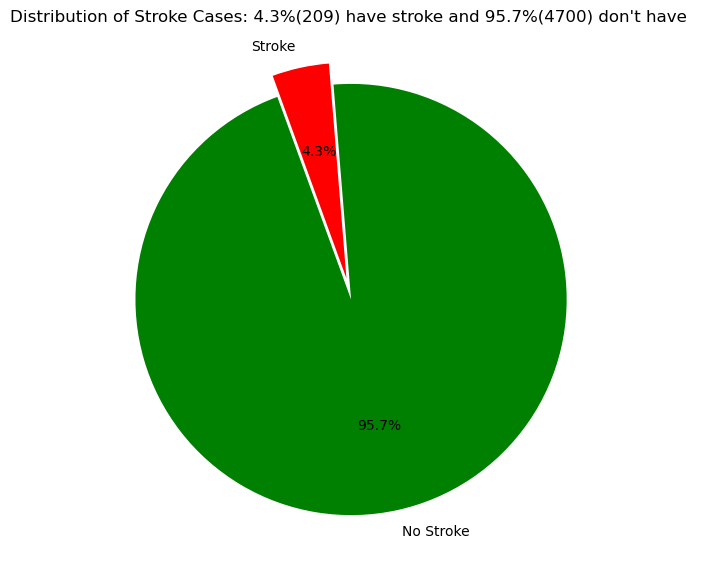

In [40]:
# count the number of persons with or without stroke and plot a piechat
stroke_count = health_drop['stroke'].value_counts().reset_index()
stroke_count 

# Data for the pie chart
stroke_count = [4700, 209]
labels = ['No Stroke', 'Stroke']
colors = ['green', 'red']  # Custom colors for each category

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(stroke_count, labels=labels, autopct='%1.1f%%', startangle=110, colors=colors, explode=[0, 0.1])
plt.title("Distribution of Stroke Cases: 4.3%(209) have stroke and 95.7%(4700) don't have ")
plt.show();



In [32]:
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


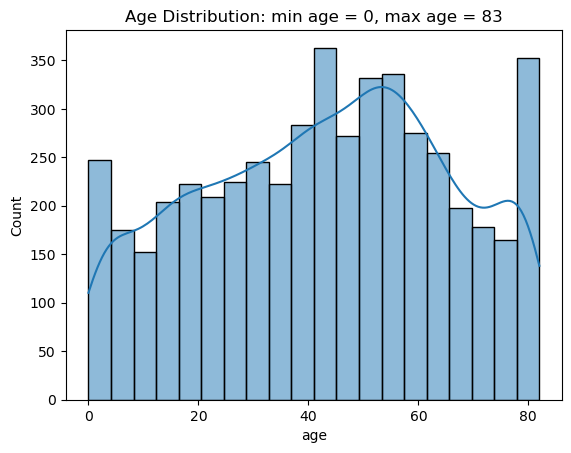

In [39]:
# Lets check the age distribution
sns.histplot(health_drop['age'], kde = True)
plt.title('Age Distribution: min age = 0, max age = 83')
plt.xlabel('age')

plt.show();
 

In [35]:
# how many patient have stroke?  ans = 209 
stroke_count = health_drop['stroke'].value_counts()
stroke_count


stroke
0    4700
1     209
Name: count, dtype: int64

### Note: In this analysis, red represents cases with stroke, while green represents cases without stroke

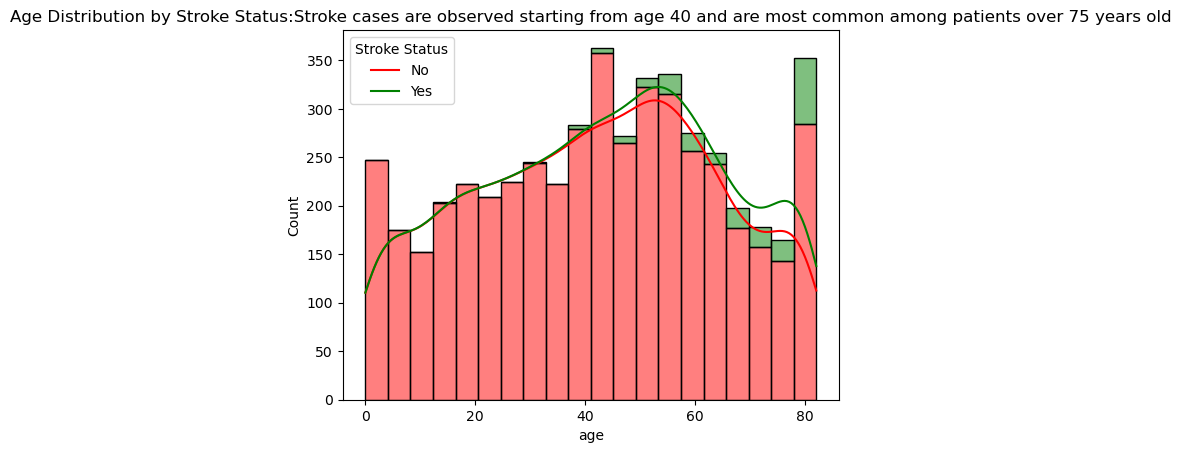

In [137]:
# Relationship between age and stroke
sns.histplot(health_drop, x = 'age',  hue='stroke', multiple='stack', palette=['green', 'red'], kde=True)
plt.title('Age Distribution by Stroke Status:Stroke cases are observed starting from age 40 and are most common among patients over 75 years old')
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show();


#### What's the relationship between marriage and stroke?
**1. By examining the proportion of stroke cases by marital status, we observe an increase in the stroke rate among individuals who have been married at least once**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of married people.**

In [44]:
# count the number of people who are either married or unmarried
health_drop['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [104]:
# Since there are more married people in the dataset, we will calculate the stroke rate based on each category of marriage.
ever_married_stroke_rate = health_drop.groupby('ever_married')['stroke'].mean()
ever_married_stroke_rate

ever_married
No     0.013490
Yes    0.058052
Name: stroke, dtype: float64

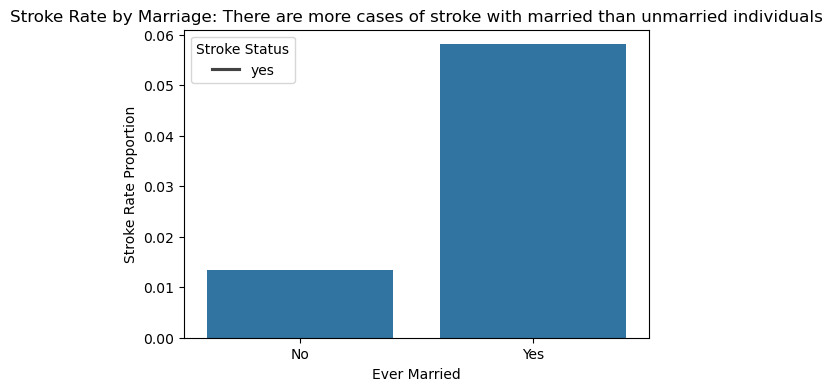

In [145]:
#Relationship between Ever married and stroke 
plt.figure(figsize=(6, 4))
sns.barplot(x=ever_married_stroke_rate.index,y=ever_married_stroke_rate.values)
plt.title('Stroke Rate by Marriage: There are more cases of stroke with married than unmarried individuals')
plt.xlabel('Ever Married')
plt.ylabel('Stroke Rate Proportion')
plt.legend(title='Stroke Status', labels=['yes'])
plt.show()

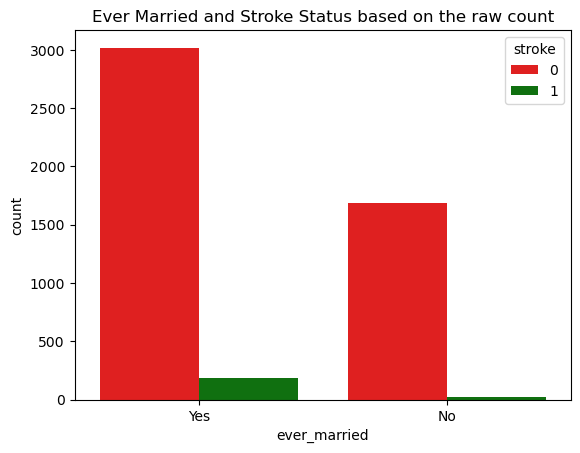

In [110]:
sns.countplot(data= health_drop, x='ever_married', palette=['red', 'green'], hue='stroke')
plt.title('Ever Married and Stroke Status based on the raw count')
plt.show();

#### What's the relationship between gender and stroke?
**1. By examining the proportion of stroke cases by gender, we observe an increase in the stroke rate in MALE than in FEMALE**

**2. A direct count of stroke cases dont show a similar trend because the dataset contains a larger number of FEMALE than MALE.**

In [116]:
# count the number of stroke cases for male and female
health_drop['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [118]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
gender_stroke_rate = health_drop.groupby('gender')['stroke'].mean()
gender_stroke_rate

gender
Female    0.041422
Male      0.044257
Other     0.000000
Name: stroke, dtype: float64

In [174]:
stroke_count_by_gender = gender_stroke_rate *health_drop['gender'].value_counts()
stroke_count_by_gender 

gender
Female    120.0
Male       89.0
Other       0.0
dtype: float64

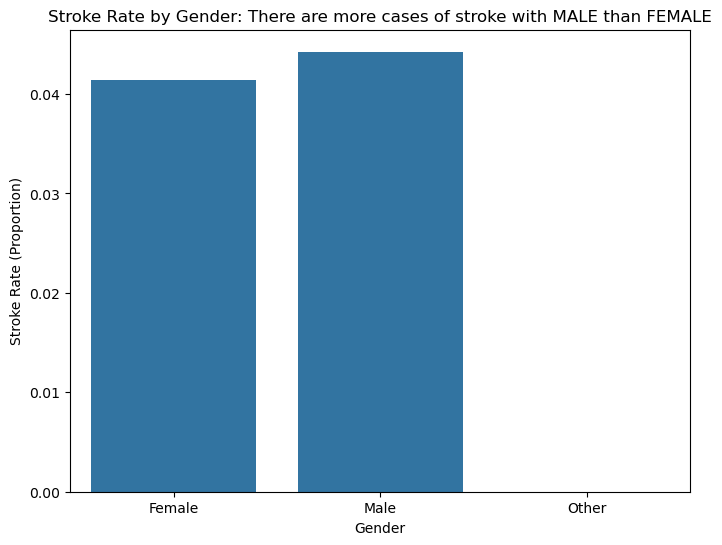

In [156]:
# Relationship between gender and stroke 
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_stroke_rate.index, y=gender_stroke_rate.values)
plt.title('Stroke Rate by Gender: There are more cases of stroke with MALE than FEMALE')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

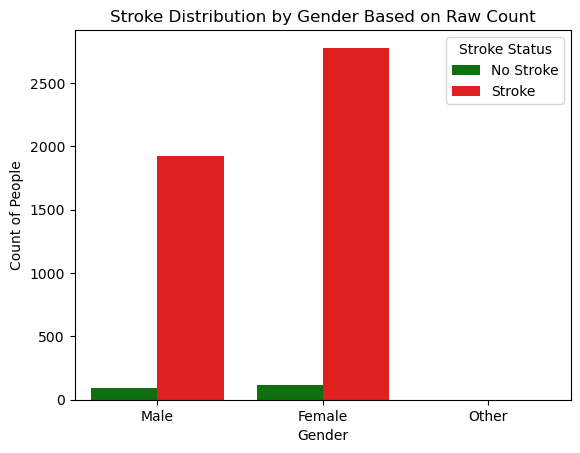

In [157]:

sns.countplot(data = health_drop, x='gender', hue='stroke', palette=['green', 'red'])
plt.title('Stroke Distribution by Gender Based on Raw Count')
plt.xlabel('Gender')
plt.ylabel('Count of People')
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.show()

### By analyzing age, gender, and stroke together:

**1. Age is a significant risk factor, with the stroke rate increasing in older age groups.**

**2. Gender show differences in stroke incidence, with males more likely to have stroke than female.**

**3. Age and Gender Combined shows that older males are at a higher risk of stroke than older females.**

In [132]:
# Create age groups
health_drop['age_group'] = pd.cut(health_drop['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])
health_drop['age_group']

0       60-80
2       60-80
3       40-60
4       60-80
5         80+
        ...  
5104      <40
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: age_group, Length: 4909, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [213]:
health_drop.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_count,age_group
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,209,209,60-80
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,209,209,60-80
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,209,209,40-60
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,209,209,60-80
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,209,209,80+
6,53882,Male,74,Yes,1,Yes,Private,Rural,70.09,27.4,never smoked,209,209,60-80
7,10434,Female,69,No,0,No,Private,Urban,94.39,22.8,never smoked,209,209,60-80
9,60491,Female,78,No,0,Yes,Private,Urban,58.57,24.2,Unknown,209,209,60-80
10,12109,Female,81,Yes,0,Yes,Private,Rural,80.43,29.7,never smoked,209,209,80+
11,12095,Female,61,No,1,Yes,Govt_job,Rural,120.46,36.8,smokes,209,209,60-80


In [149]:
# Calculate stroke rate by age group and gender
age_gender_stroke_rate = health_drop.groupby(['age_group', 'gender'])['stroke'].mean().unstack()
age_gender_stroke_rate

C:\Users\USER\AppData\Local\Temp\ipykernel_21740\2175825958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_stroke_rate = health_drop.groupby(['age_group', 'gender'])['stroke'].mean().unstack()


gender,Female,Male,Other
age_group,,,
<40,4678.898982,4700.000000,4700.0
40-60,4538.707071,4518.030794,NaN
60-80,4211.847826,4180.299127,NaN
80+,3930.114286,3602.200000,NaN


C:\Users\USER\AppData\Local\Temp\ipykernel_21740\228718309.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_stroke_rate = health_drop.groupby(['age_group', 'gender'])['stroke'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

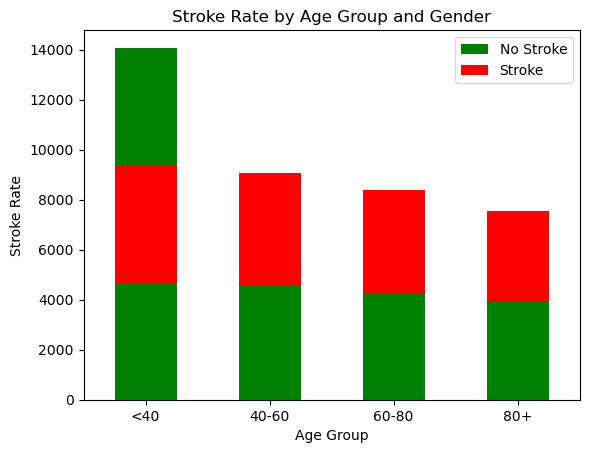

In [162]:
# What is the relationship between age, gender and stroke
# Create age groups
health_drop['age_group'] = pd.cut(health_drop['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])

# Calculate stroke rate by age group and gender
age_gender_stroke_rate = health_drop.groupby(['age_group', 'gender'])['stroke'].mean().unstack()

# Plot the stroke rate by age group and gender
plt.figure(figsize=(10, 6))
age_gender_stroke_rate.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Stroke Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])
plt.show();



#### What's the relationship between Hypertension and Stroke?
**1. By examining the proportion of stroke cases by hypertension status, we observe a higher stroke rate among individuals without a history of hypertension compared to those with hypertension**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of married people.**

In [164]:
# Whats the relationship between age, hypertention, and stroke

# count the number of stroke cases for male and female
health_drop['hypertension'].value_counts()

hypertension
No     4458
Yes     451
Name: count, dtype: int64

In [165]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_hypertension = health_drop.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
No     4549.897039
Yes    4102.527716
Name: stroke, dtype: float64

In [175]:
stroke_count_by_hypertension = stroke_rate_hypertension /health_drop['hypertension'].value_counts()
stroke_count_by_hypertension

hypertension
No     1.020614
Yes    9.096514
dtype: float64

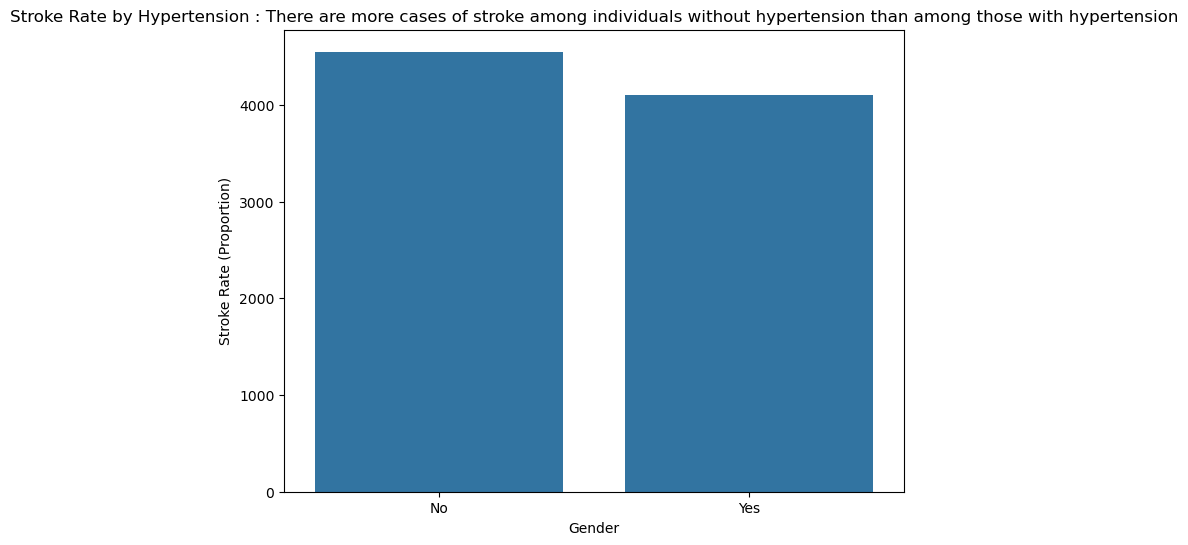

In [176]:
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_hypertension.index, y=stroke_rate_hypertension.values)
plt.title('Stroke Rate by Hypertension : There are more cases of stroke among individuals without hypertension than among those with hypertension')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

In [178]:
# count the number of stroke cases for male and female
health_drop['heart_disease'].value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

In [179]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_disease = health_drop.groupby('heart_disease')['stroke'].mean()
stroke_rate_disease

heart_disease
0    4537.338405
1    3960.740741
Name: stroke, dtype: float64

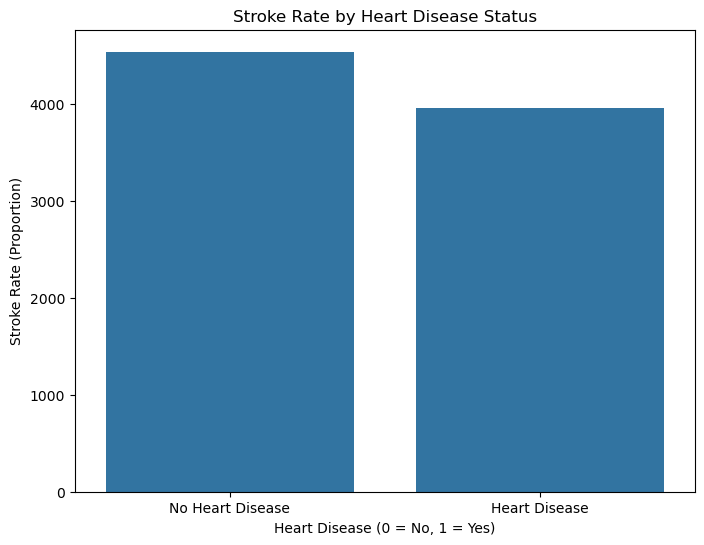

In [182]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_disease.index, y=stroke_rate_disease.values)
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate (Proportion)')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


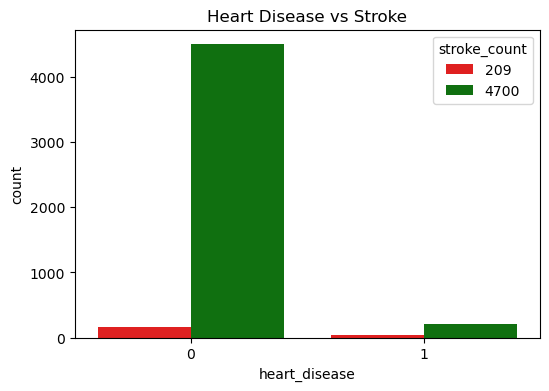

In [330]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health_drop, x='heart_disease', palette = ['red', 'green'], hue = 'stroke_count')
plt.title("Heart Disease vs Stroke")
plt.show()

In [185]:
health_drop['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [187]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_smoking = health_drop.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking

smoking_status
Unknown            4612.178692
formerly smoked    4394.161290
never smoked       4496.304536
smokes             4462.348711
Name: stroke, dtype: float64

In [194]:
smoking_status_data = {
    'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
    'stroke_rate': [4612.18, 4394.16, 4496.30, 4462.35]}
smoking_status_data

{'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
 'stroke_rate': [4612.18, 4394.16, 4496.3, 4462.35]}

In [197]:
# Create the DataFrame from the data
smoking_group = pd.DataFrame(smoking_status_data)
smoking_group

,smoking_status,stroke_rate
0,Unknown,4612.18
1,formerly smoked,4394.16
2,never smoked,4496.30
3,smokes,4462.35


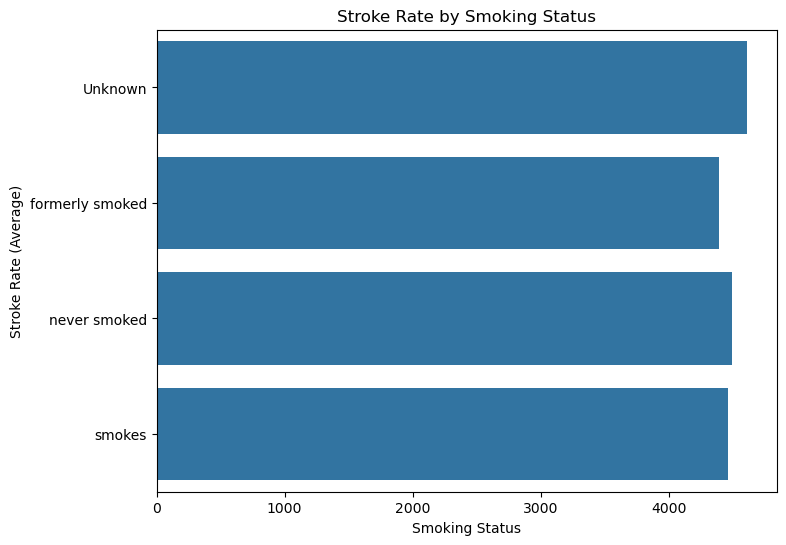

In [200]:
# Example data (replace with your calculated stroke averages for each smoking status)


# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data=smoking_group, y='smoking_status', x='stroke_rate')

# Adding a title and labels
plt.title('Stroke Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Rate (Average)')
plt.show()


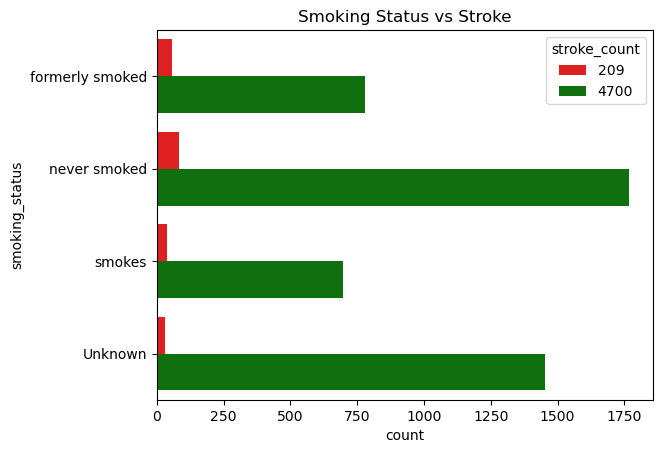

In [321]:
# Smoking Status vs Stroke

sns.countplot(data= health_drop, y='smoking_status', palette = ['red', 'green'], hue='stroke_count')
plt.title("Smoking Status vs Stroke")
plt.show()



In [202]:
health_drop['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [203]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_work = health_drop.groupby('work_type')['stroke'].mean()
stroke_rate_work

work_type
Govt_job         4500.400000
Never_worked     4700.000000
Private          4497.098186
Self-employed    4392.873548
children         4693.307004
Name: stroke, dtype: float64

In [208]:
smoking_status_work = {
    'work_type': ['Govt_job', 'Never_worked', 'Private', 'Self-employed ','children'],
    'stroke_rate': [4500.400000, 4700.000000, 4497.098186, 4392.873548,4693.307004 ]}
smoking_status_work

{'work_type': ['Govt_job',
  'Never_worked',
  'Private',
  'Self-employed ',
  'children'],
 'stroke_rate': [4500.4, 4700.0, 4497.098186, 4392.873548, 4693.307004]}

In [209]:
stroke_work = pd.DataFrame(smoking_status_work)
stroke_work

,work_type,stroke_rate
0,Govt_job,4500.400000
1,Never_worked,4700.000000
2,Private,4497.098186
3,Self-employed,4392.873548
4,children,4693.307004


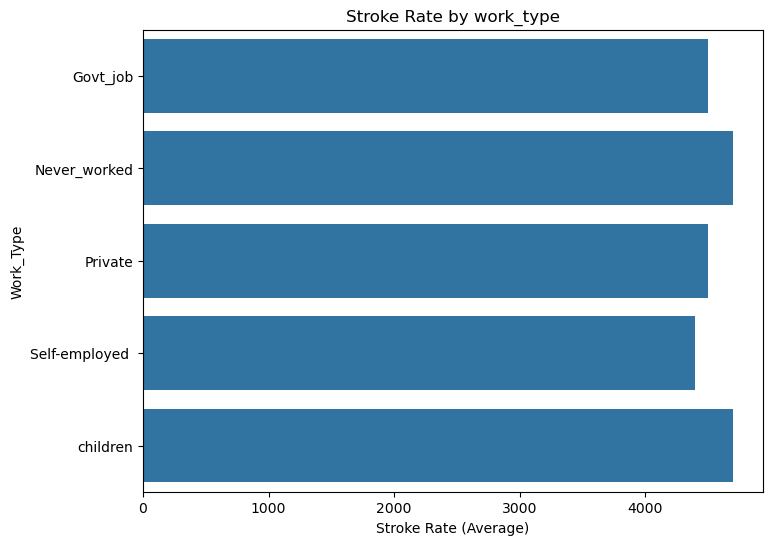

In [211]:
# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data= stroke_work, y='work_type', x='stroke_rate')

# Adding a title and labels
plt.title('Stroke Rate by work_type')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Work_Type')
plt.show()

In [201]:
mean_age = health_drop['age'].mean()
mean_age

42.85414544713791

In [366]:
mean_glucose = health_drop['avg_glucose_level'].mean()
mean_glucose

105.3051497249949

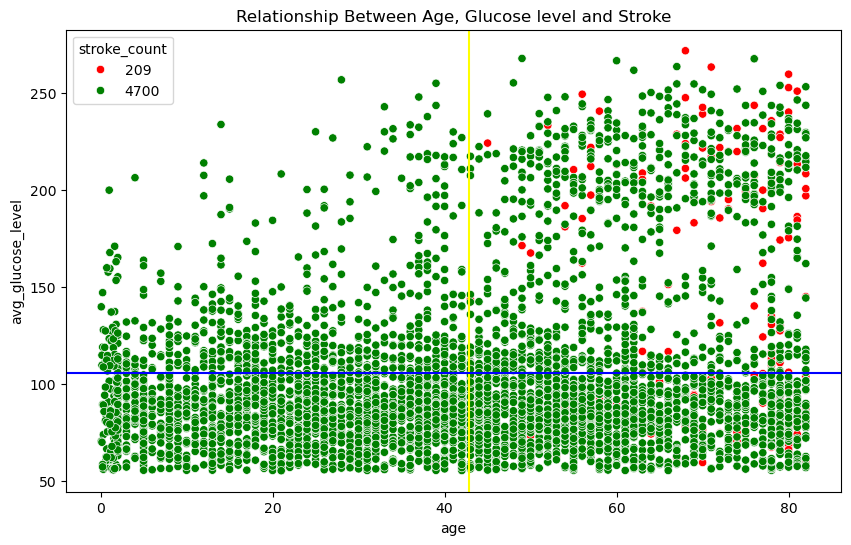

In [374]:
# Dose glucose level increase or decrease stroke 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_glucose_level', palette = ['red','green'], hue = 'stroke_count', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_glucose, color='blue', linestyle='-', label=f'Mean Glucose: {mean_glucose:.2f}')
plt.title('Relationship Between Age, Glucose level and Stroke')
plt.show()


In [377]:
mean_bmi = health_drop['bmi'].mean()
mean_bmi

28.893236911794663

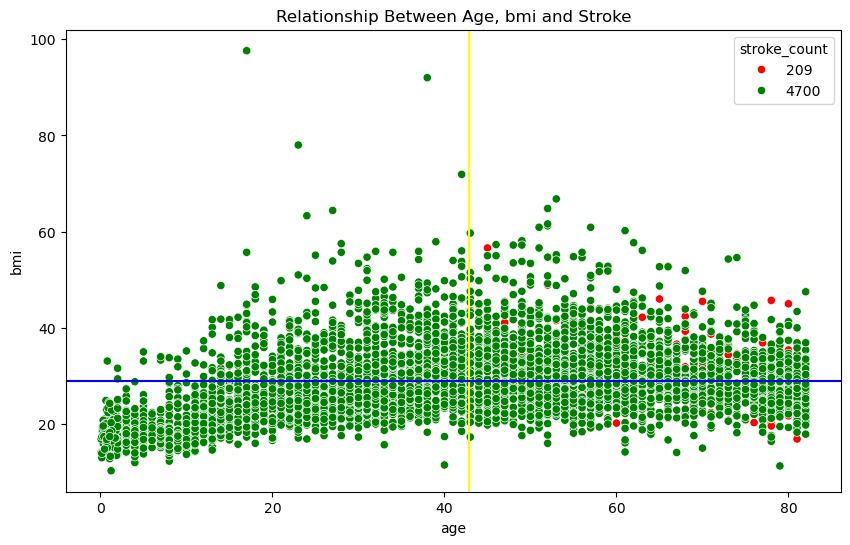

In [378]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', palette = ['red','green'], hue = 'stroke_count', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean age: {mean_age:.2f}')
plt.axhline(mean_bmi, color='blue', linestyle='-', label=f'Mean bmi: {mean_bmi:.2f}')
plt.title('Relationship Between Age, bmi and Stroke')
plt.show()